In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/loan_data.csv'  # Adjust the path as necessary in your Colab environment
data = pd.read_csv(file_path)

# Quick overview of the dataset
data.info()
data.head()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [2]:
# Check for missing values
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data


,0


In [3]:
# Summary statistics
data.describe()


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


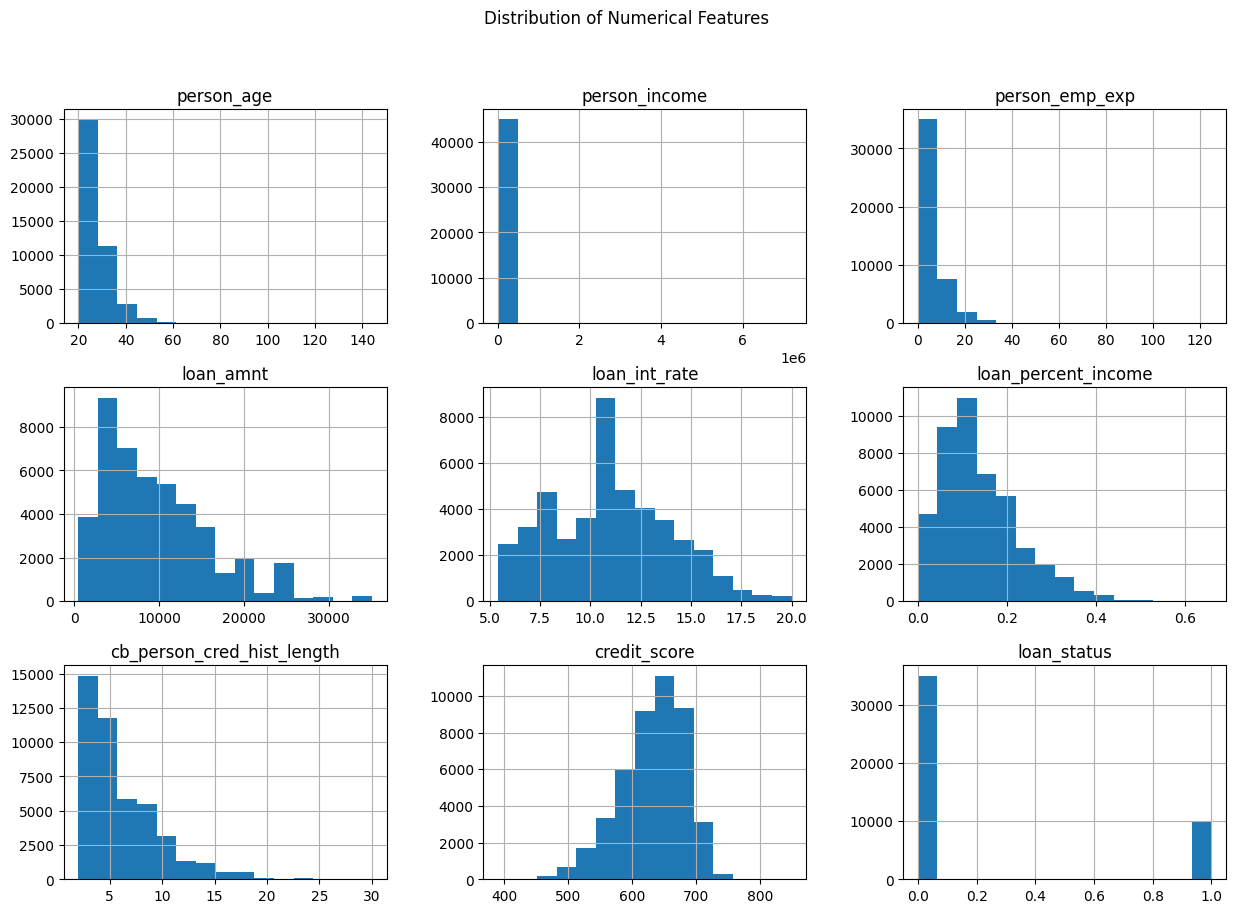

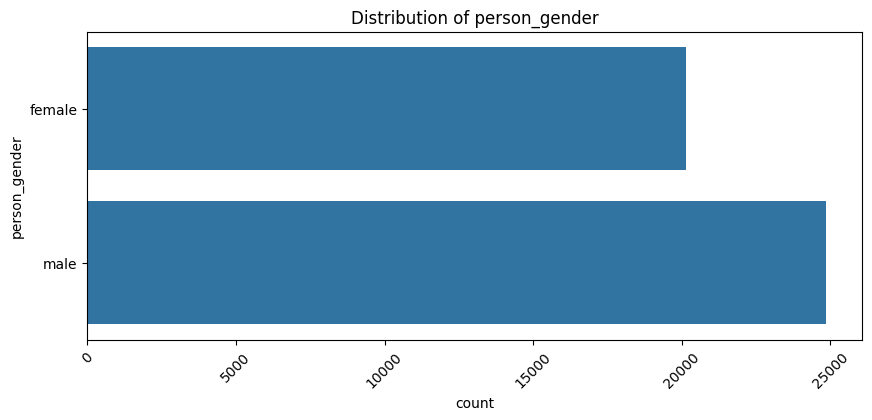

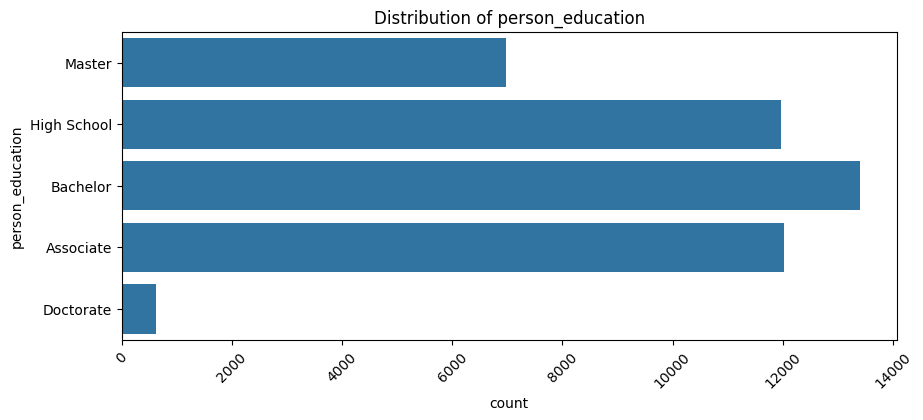

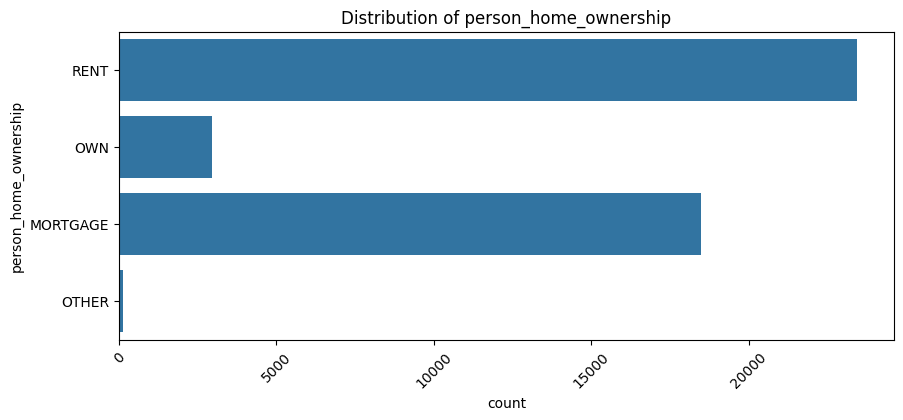

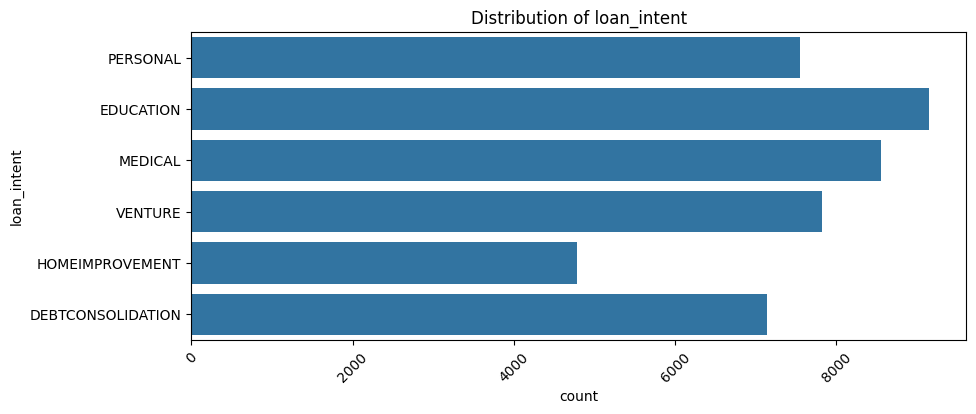

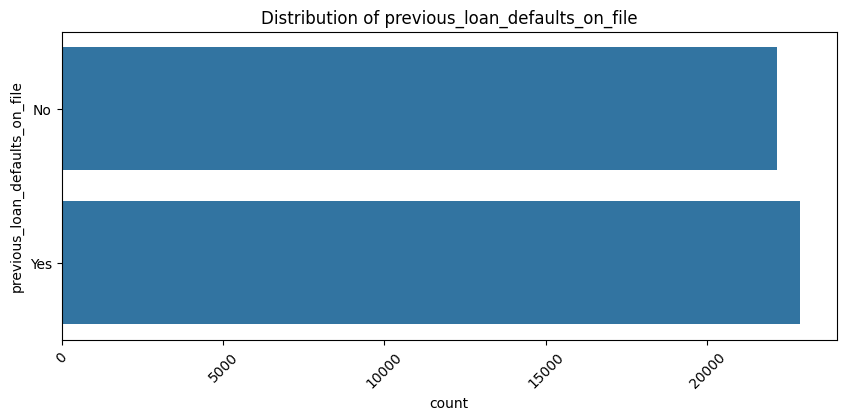

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical features
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Bar plot for categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


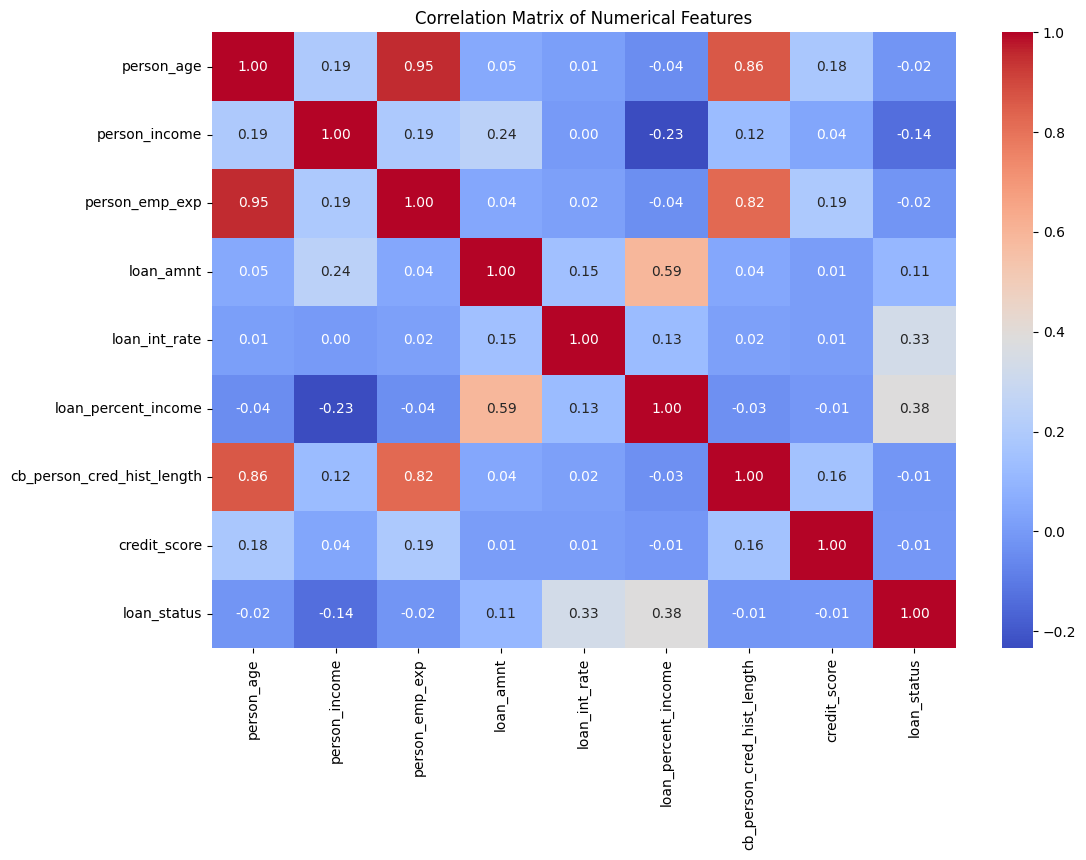

In [7]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

if not numeric_data.empty:
    # Plot correlation matrix heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix of Numerical Features")
    plt.show()
else:
    print("No numeric columns available for correlation matrix.")

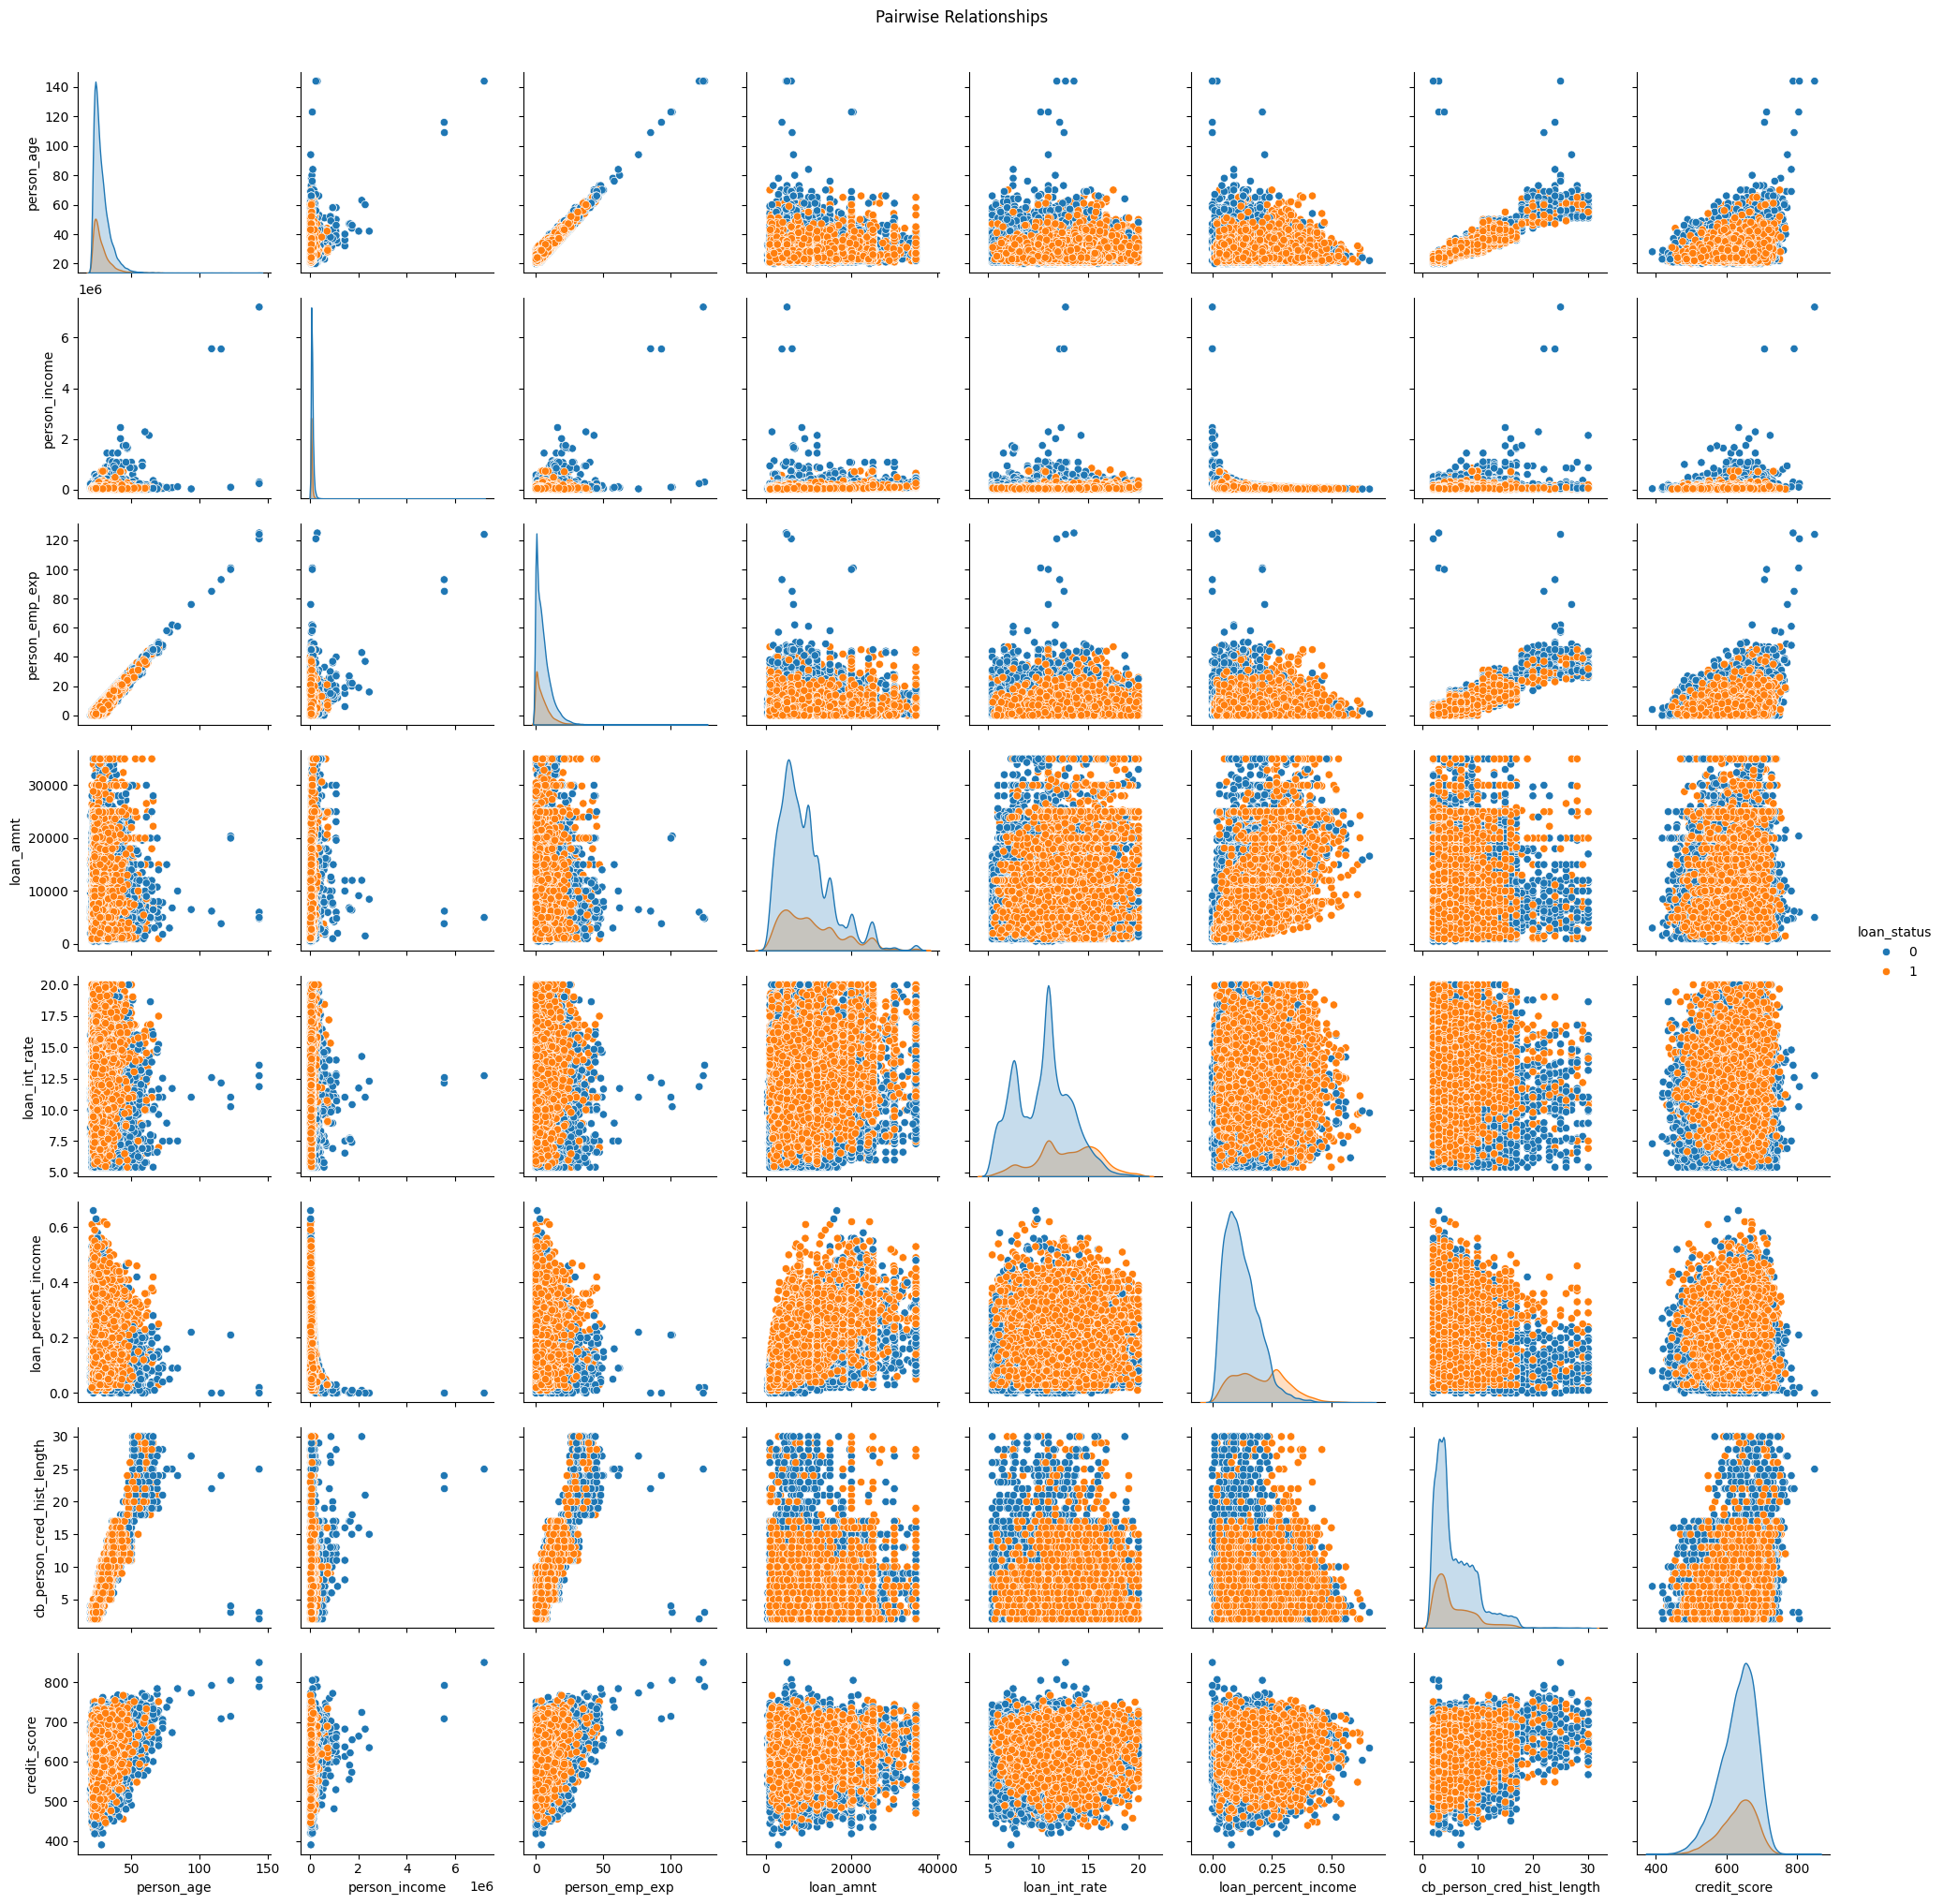

In [8]:
sns.pairplot(data, hue='loan_status')  # Replace 'loan_status' with the actual column if different
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


In [11]:
import json

columns = ['loan_amnt', 'loan_int_rate', 'person_income', 'credit_score']
data_subset = data[columns].dropna().head(100)

# Convert to JSON format for D3.js
data_json = data_subset.to_dict(orient='records')
data_json_str = json.dumps(data_json)  # Convert to string for embedding in HTML


In [13]:
from IPython.display import HTML

HTML(f"""
<html>
  <head>
    <script src="https://d3js.org/d3.v6.min.js"></script>
    <style>
      /* CSS styles for the D3.js visualization */
      .axis path, .axis line {{
        fill: none;
        stroke: #000;
        shape-rendering: crispEdges;
      }}
      .line {{
        fill: none;
        stroke-width: 1.5px;
      }}
    </style>
  </head>
  <body>
    <div id="parallel-coordinates"></div>
    <script>
      // JavaScript and D3.js code
      const data = {data_json_str};  // JSON data from Python

      const margin = {{top: 30, right: 10, bottom: 10, left: 0}},
            width = 800 - margin.left - margin.right,
            height = 400 - margin.top - margin.bottom;

      const svg = d3.select("#parallel-coordinates")
                    .append("svg")
                    .attr("width", width + margin.left + margin.right)
                    .attr("height", height + margin.top + margin.bottom)
                    .append("g")
                    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

      const dimensions = Object.keys(data[0]);

      const y = {{}};
      for (const dim of dimensions) {{
        y[dim] = d3.scaleLinear()
                    .domain(d3.extent(data, d => +d[dim]))
                    .range([height, 0]);
      }}

      const x = d3.scalePoint()
                  .range([0, width])
                  .padding(1)
                  .domain(dimensions);

      function path(d) {{
        return d3.line()(dimensions.map(p => [x(p), y[p](+d[p])]));
      }}

      svg.selectAll("myPath")
         .data(data)
         .enter()
         .append("path")
         .attr("class", "line")
         .attr("d", path)
         .style("fill", "none")
         .style("stroke", "steelblue")
         .style("opacity", 0.5);

      svg.selectAll("myAxis")
         .data(dimensions)
         .enter()
         .append("g")
         .attr("transform", d => "translate(" + x(d) + ")")
         .each(function(d) {{
           d3.select(this).call(d3.axisLeft().scale(y[d]));
         }})
         .append("text")
         .style("text-anchor", "middle")
         .attr("y", -9)
         .text(d => d)
         .style("fill", "black");
    </script>
  </body>
</html>
""")
